In [1]:
#https://www.kaggle.com/c/ubiquant-market-prediction/overview
DATA_PATH = '/Users/gauravtyagi/Downloads/Data/ubiquant-market-prediction/train.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#data=pd.read_csv(DATA_PATH,nrows=5000)
data=pd.read_csv(DATA_PATH)

In [3]:
data.dtypes.value_counts()

float64    301
int64        2
object       1
dtype: int64

In [4]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

row_id    3141410
dtype: int64

In [5]:
data.head(5)

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624


In [6]:
data.columns

Index(['row_id', 'time_id', 'investment_id', 'target', 'f_0', 'f_1', 'f_2',
       'f_3', 'f_4', 'f_5',
       ...
       'f_290', 'f_291', 'f_292', 'f_293', 'f_294', 'f_295', 'f_296', 'f_297',
       'f_298', 'f_299'],
      dtype='object', length=304)

In [7]:
target = data['target']


In [8]:
data.drop('target',axis='columns')

,row_id,time_id,investment_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,0.979656,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,0.778096,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,-0.946789,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141405,1219_3768,1219,3768,0.093530,-0.720275,-0.345497,-0.438781,-0.166972,-0.437182,1.475746,...,-0.285908,-1.232434,-0.660579,0.875537,0.421628,-0.428097,-0.075548,-0.533092,-0.193732,-0.581394
3141406,1219_3769,1219,3769,-1.344935,-0.199987,-0.107702,-0.454677,-0.221914,-0.141174,-1.498235,...,0.184517,-1.232434,-0.670493,0.875537,0.421628,-0.729949,-1.514277,0.013145,-0.890270,-0.589705
3141407,1219_3770,1219,3770,0.979489,-1.110491,1.006980,-0.467307,-0.159549,1.355671,0.150812,...,-0.756332,-1.232434,0.820784,-1.142157,0.421628,-0.363329,1.363181,-0.079106,-1.580124,-0.297625
3141408,1219_3772,1219,3772,-2.565332,0.320301,0.076600,1.380182,-0.155366,-0.689000,0.381069,...,-0.756332,-1.232434,0.133074,-1.142157,0.421628,-0.375288,-1.514277,-0.973762,0.608647,-0.372040


In [9]:
target.head(2)

0   -0.300875
1   -0.231040
Name: target, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.33, random_state=42)

In [12]:
#Plot data here 
# import seaborn as sns
# from matplotlib import pyplot as plt

In [13]:
# sns.get_dataset_names()

In [14]:
# plt.scatter(data['row_id'],data['investment_id'])
# sns.set()
# sns.set_style("whitegrid")
# plt.show()

In [15]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
# Missing values statistics
# missing_values = missing_values_table(data)
# missing_values.head(20)

In [17]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [18]:
clf.fit(X_train,y_train)

LinearRegression()

In [19]:
clf.predict(X_test)

array([-0.17941299,  0.42134905, -0.63167655, ...,  2.0952702 ,
       -1.311755  ,  0.7911608 ])

In [20]:
clf.score(X_test,y_test)

1.0

TypeError: unhashable type: 'numpy.ndarray'

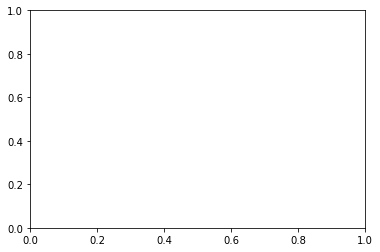

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.scatter(X_test,y_test)
sns.set()
sns.set_style("whitegrid")
plt.show()